In [1]:
# load pkgs
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

os.chdir("/home/u5u/kdeng.u5u/spatial-reasoning-of-LMs")
from src.dataset.utils import load_dataset
from torch.utils.data import DataLoader

Split: psi, Label: counterclockwise


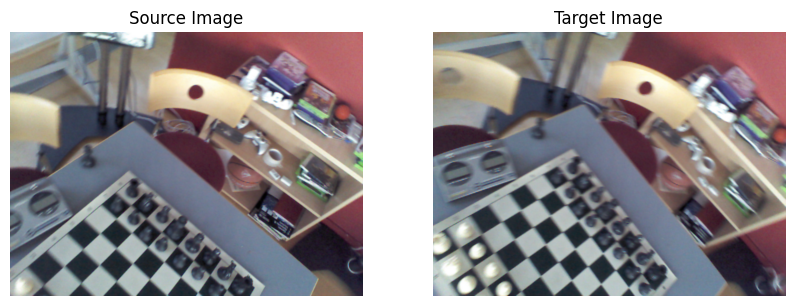

Split: theta, Label: upward


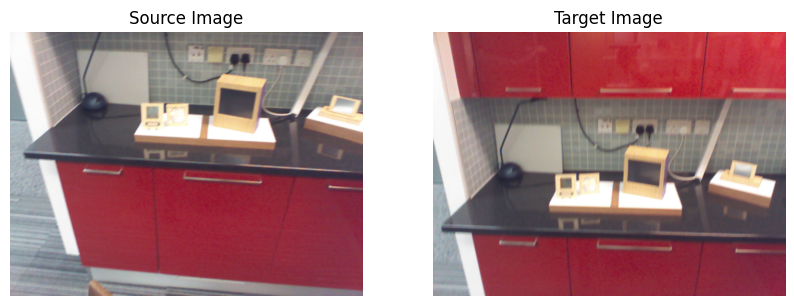

Split: tz, Label: forward


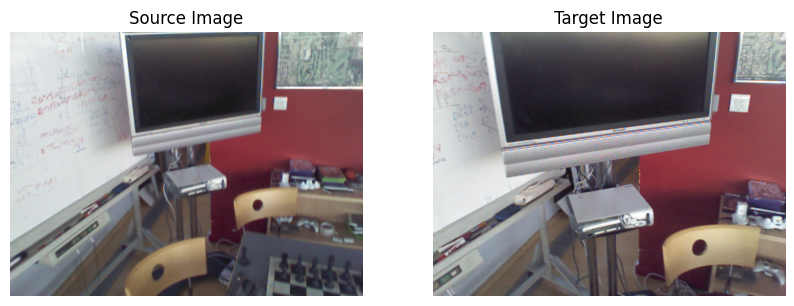

Split: tx, Label: left


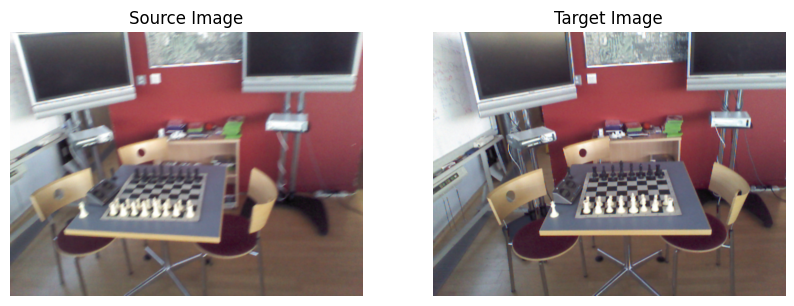

Split: phi, Label: rightward


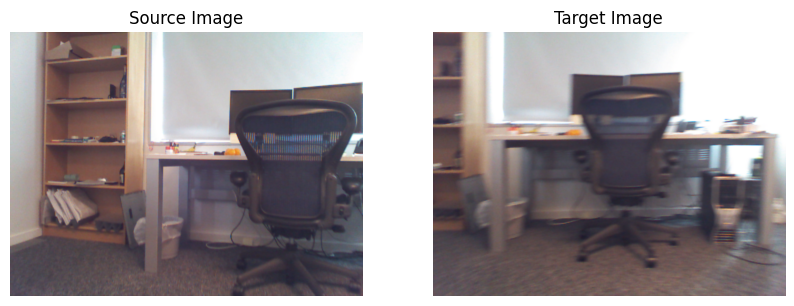

Split: ty, Label: down


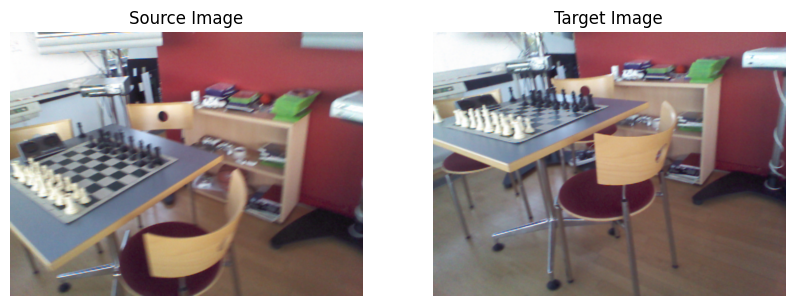

In [ ]:
c1_seven_scenes_dir = Path("/home/u5u/kdeng.u5u/benchmark/single-dof-camera-motion-7-scenes")
for tau_dir in c1_seven_scenes_dir.iterdir():
    if tau_dir.is_dir():
        dataset = load_dataset(tau_dir.parent.name, tau_dir)
        dataloader = DataLoader(dataset, batch_size=1, shuffle=True, collate_fn=lambda x: x)

        batch = next(iter(dataloader))
        item = next(iter(batch))

        split = tau_dir.name.split('_')[0]
        label = item["metadata"]["significance_text"]

        print(f"Split: {split}, Label: {label}")
        
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].imshow(item["source_image"].permute(1, 2, 0).numpy())
        ax[0].set_title("Source Image")
        ax[0].axis('off')
        ax[1].imshow(item["target_image"].permute(1, 2, 0).numpy())
        ax[1].set_title("Target Image")
        ax[1].axis('off')
        plt.show()

        # fig_dir = Path(f"/home/u5u/kdeng.u5u/spatial-reasoning-of-LMs/result/dataset-examples/c1/{split}/{label}")
        # os.makedirs(fig_dir, exist_ok=True)

        # fig.savefig(fig_dir / f"{split}_{label}.png", bbox_inches='tight', dpi=400)

        ex_dir = Path(f"/home/u5u/kdeng.u5u/spatial-reasoning-of-LMs/result/dataset-examples/c1-examples/{split}")
        os.makedirs(ex_dir, exist_ok=True)

        # save the source and target images separately in pdf format
        source_img = item["source_image"].permute(1, 2, 0).numpy()
        source_img_path = ex_dir / 'src'
        os.makedirs(source_img_path, exist_ok=True)
        plt.imsave(source_img_path / f"{split}_source.pdf", source_img)

        target_img = item["target_image"].permute(1, 2, 0).numpy()
        target_img_path = ex_dir / 'tgt'
        os.makedirs(target_img_path, exist_ok=True)
        plt.imsave(target_img_path / f"{split}_target.pdf", target_img)





Angle: 60 Actual Angle: 61.92071


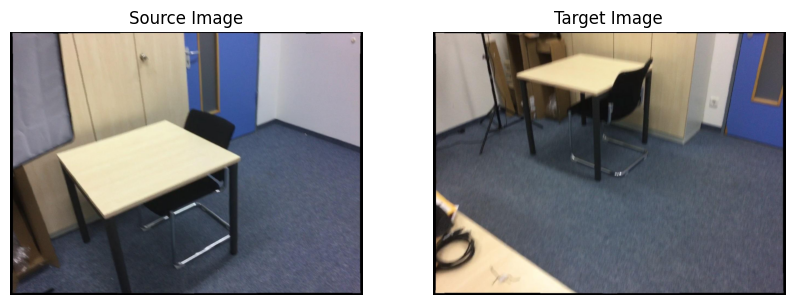

Angle: 45 Actual Angle: 45.546349


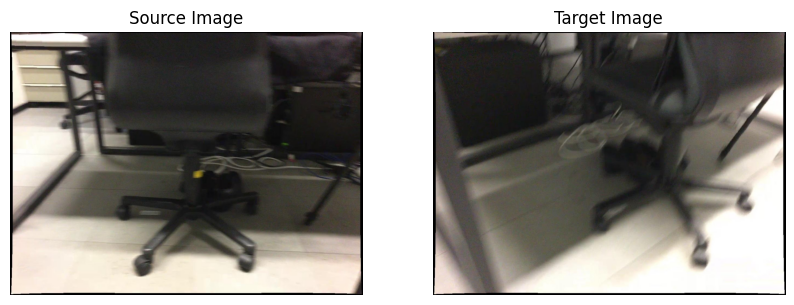

Angle: 15 Actual Angle: 15.740134


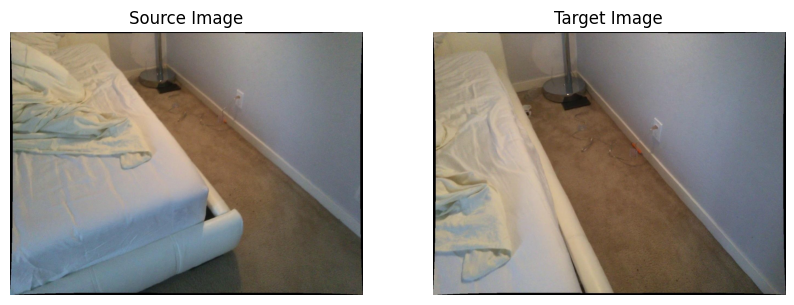

Angle: 30 Actual Angle: 36.424237


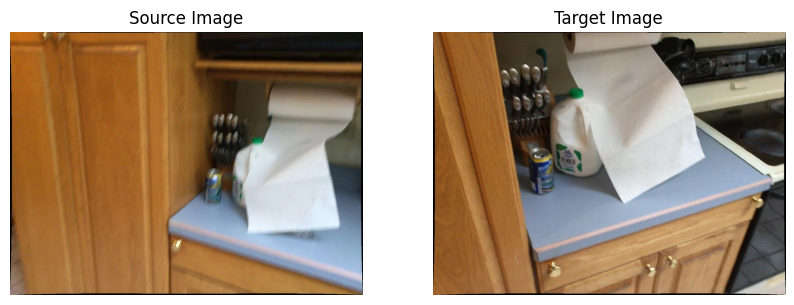

In [3]:
c2_scannet_dir = Path("/home/u5u/kdeng.u5u/benchmark/obj-centered-view-shift-scannet")
for tau_dir in c2_scannet_dir.iterdir():
    if tau_dir.is_dir():
        dataset = load_dataset(tau_dir.parent.name, tau_dir)
        dataloader = DataLoader(dataset, batch_size=1, shuffle=True, collate_fn=lambda x: x)

        batch = next(iter(dataloader))
        item = next(iter(batch))

        # split = tau_dir.name.split('_')[0]
        angle = tau_dir.name.split("-")[-2]
        label = item["metadata"]["angle"]

        print(f"Angle: {angle} Actual Angle: {label}")
        
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        plt.suptitle("")
        ax[0].imshow(item["source_image"].permute(1, 2, 0).numpy())
        ax[0].set_title("Source Image")
        ax[0].axis('off')
        ax[1].imshow(item["target_image"].permute(1, 2, 0).numpy())
        ax[1].set_title("Target Image")
        ax[1].axis('off')
        plt.show()

        ex_dir = Path(f"/home/u5u/kdeng.u5u/spatial-reasoning-of-LMs/result/dataset-examples/c2-examples/{angle}")
        os.makedirs(ex_dir, exist_ok=True)

        # save the source and target images separately in pdf format
        source_img = item["source_image"].permute(1, 2, 0).numpy()
        source_img_path = ex_dir / 'src'
        os.makedirs(source_img_path, exist_ok=True)
        plt.imsave(source_img_path / f"{angle}_source.pdf", source_img, dpi=200)

        target_img = item["target_image"].permute(1, 2, 0).numpy()
        target_img_path = ex_dir / 'tgt'
        os.makedirs(target_img_path, exist_ok=True)
        plt.imsave(target_img_path / f"{angle}_target.pdf", target_img, dpi=200)

In [2]:
subset_a = 98.8
subset_b = 95.8
coco_one = 91.5
coco_two = 90
gqa_one = 93.4
gqa_two = 90

((subset_a+subset_b)/2 + (coco_one+coco_two)/2 + (gqa_one+gqa_two)/2)/3

93.25

In [3]:
def _read_c1():
    c1_seven_scenes = Path("/home/u5u/kdeng.u5u/benchmark/single-dof-camera-motion-7-scenes")
    c1_scannet = Path("/home/u5u/kdeng.u5u/benchmark/single-dof-camera-motion-scannet")
    c1_scannetpp = Path("/home/u5u/kdeng.u5u/benchmark/single-dof-camera-motion-scannetpp")

    c1_seven_scenes = pd.read_json(c1_seven_scenes / "global_metadata.jsonl", lines=True)
    c1_scannet = pd.read_json(c1_scannet / "global_metadata.jsonl", lines=True)
    c1_scannetpp = pd.read_json(c1_scannetpp / "global_metadata.jsonl", lines=True)

    c1_seven_scenes["dataset"] = "7 Scenes"
    c1_scannet["dataset"] = "ScanNet"
    c1_scannetpp["dataset"] = "ScanNet++"

    c1 = pd.concat([c1_seven_scenes, c1_scannet, c1_scannetpp], ignore_index=True)
    return c1

def _read_c2():
    c2_seven_scenes_dir = Path("/home/u5u/kdeng.u5u/benchmark/obj-centered-view-shift-7-scenes")
    c2_scannet_dir = Path("/home/u5u/kdeng.u5u/benchmark/obj-centered-view-shift-scannet")

    c2_seven_scenes = pd.DataFrame()
    for tau_dir in c2_seven_scenes_dir.iterdir():
        if not tau_dir.is_dir():
            continue
        tau = tau_dir.name.split("-")[-2]
        tau_df = pd.read_json(tau_dir / "global_metadata.jsonl", lines=True)
        tau_df["tau"] = tau
        c2_seven_scenes = pd.concat([c2_seven_scenes, tau_df], ignore_index=True)

    c2_seven_scenes["dataset"] = "7 Scenes"

    c2_scannet = pd.DataFrame()
    for tau_dir in c2_scannet_dir.iterdir():
        if not tau_dir.is_dir():
            continue
        tau = tau_dir.name.split("-")[-2]
        tau_df = pd.read_json(tau_dir / "global_metadata.jsonl", lines=True)
        tau_df["tau"] = tau
        c2_scannet = pd.concat([c2_scannet, tau_df], ignore_index=True)

    c2_scannet["dataset"] = "ScanNet"

    c2 = pd.concat([c2_seven_scenes, c2_scannet], ignore_index=True)
    return c2